In [1]:
from pylab import *

In [2]:
from sklearn.datasets import make_classification

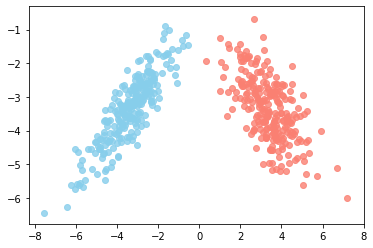

In [3]:
X, Y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_clusters_per_class=1, 
    n_redundant=0,
    class_sep=3.4,
    random_state=20
)

Y = Y.reshape(500, 1)

scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)

show()

In [4]:
import torch

In [5]:
XT = torch.Tensor(X)
YT = torch.Tensor(Y)

In [6]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, n):
        super(LogisticRegression, self).__init__()
        
        self.linear = torch.nn.Linear(n, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        
        return y_pred

In [7]:
model = LogisticRegression(2)

In [8]:
import time
from IPython.display import clear_output

def train_model(model, x_data, y_data, epochs=1000, lr=0.01):
    
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.BCELoss(reduction='mean')
    
    loss_history = []
    
    for i in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = model(x_data)
        
        # Compute loss
        loss = criterion(y_pred, y_data)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        if i % 25 == 0:
            loss_history.append(loss.item())
            
            res = 50
            
            _x0 = np.linspace(-8, 8, res)
            _x1 = np.linspace(0, -7, res)
            
            _Y = np.zeros((res, res))
            
            for i0, x0 in enumerate(_x0):
                for i1, x1 in enumerate(_x1):
                    _Y[i0, i1] = model(torch.Tensor([[x0, x1]]))
                    
            plt.pcolormesh(_x0, _x1, _Y.T, cmap="coolwarm")
            
            
            plt.scatter(X[Y[:,0]==0, 0], X[Y[:,0]==0, 1], color="skyblue", alpha=0.8)
            plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], color="salmon", alpha=0.8)
            
            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss_history)), loss_history)
            plt.show()
            time.sleep(0.5)            

In [9]:
X_mean = torch.mean(XT, dim=0) # Media
X_var = torch.var(XT, dim=0)   # Varianza

X_ = (XT - X_mean) / torch.sqrt(X_var)

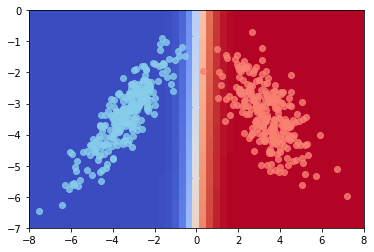

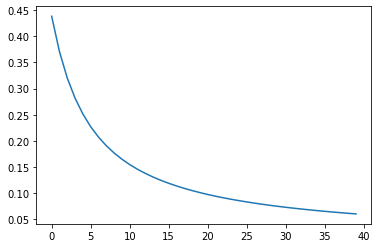

In [10]:
train_model(model, X_, YT, lr=0.03)